In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
start_time = pd.Timestamp('2025-10-06 18:00:00')
df1 = pd.read_csv('../outputs/pipeline_run/tracks_video_3_24fps.csv')
df2 = pd.read_csv('../outputs/pipeline_run/tracks_video_4_24fps.csv')
df2['frame'] = df1['frame'].max() + 2 + df2['frame']
df2['tracker_id'] = df2['tracker_id'] + df1['tracker_id'].max()
df_track = pd.concat([df1, df2], ignore_index=True)
df_track['second'] = df_track['frame'] / 24
df_track['timestamp'] = start_time + pd.to_timedelta(df_track['second'], unit='s')
df_track

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,class_name,frame,lv95_E,lv95_N,second,timestamp
0,396.500760,265.317500,435.22174,298.09340,3,0.893168,1,car,0,2680856.5,1248087.4,0.00,2025-10-06 18:00:00.000
1,252.669200,173.365300,301.66050,211.91098,3,0.890062,2,car,0,2680842.8,1248096.2,0.00,2025-10-06 18:00:00.000
2,585.264700,390.093350,627.72100,426.62076,3,0.888664,3,car,0,2680875.8,1248074.6,0.00,2025-10-06 18:00:00.000
3,94.042244,70.888960,137.00345,103.67353,3,0.883950,4,car,0,2680826.5,1248106.8,0.00,2025-10-06 18:00:00.000
4,325.405850,214.854640,369.85947,250.86885,3,0.881080,5,car,0,2680849.8,1248092.2,0.00,2025-10-06 18:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300322,215.017790,194.584150,258.00630,229.92828,3,0.594776,7295,car,63102,2680848.5,1248092.0,2629.25,2025-10-06 18:43:49.250
300323,103.368310,119.855960,146.78412,154.12160,3,0.845623,7321,car,63102,2680837.2,1248099.5,2629.25,2025-10-06 18:43:49.250
300324,0.475049,52.168625,46.88651,88.06561,3,0.896018,7373,car,63102,2680827.0,1248106.2,2629.25,2025-10-06 18:43:49.250
300325,450.436300,366.733000,495.75778,405.69757,3,0.897785,7086,car,63102,2680872.0,1248074.6,2629.25,2025-10-06 18:43:49.250


In [24]:
df_track = df_track.sort_values(['tracker_id', 'timestamp'])
df_track['lv95_N_shift'] = df_track.groupby('tracker_id')['lv95_N'].shift(1)
df_track['lv95_E_shift'] = df_track.groupby('tracker_id')['lv95_E'].shift(1)
df_track['timestamp_shift'] = df_track.groupby('tracker_id')['timestamp'].shift(1)

df_track['distance'] = np.sqrt(
    (df_track['lv95_N'] - df_track['lv95_N_shift']) ** 2 +
    (df_track['lv95_E'] - df_track['lv95_E_shift']) ** 2
)
df_track['time_diff'] = (df_track['timestamp'] - df_track['timestamp_shift']).dt.total_seconds()
df_track['speed'] = df_track['distance'] / df_track['time_diff']
df_track

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,class_name,frame,lv95_E,lv95_N,second,timestamp,lv95_N_shift,lv95_E_shift,timestamp_shift,distance,time_diff,speed
0,396.50076,265.31750,435.22174,298.09340,3,0.893168,1,car,0,2680856.5,1248087.4,0.000000,2025-10-06 18:00:00.000000000,NaN,NaN,NaT,NaN,NaN,NaN
11,396.59637,265.32532,435.43610,298.15076,3,0.894108,1,car,2,2680856.5,1248087.4,0.083333,2025-10-06 18:00:00.083333333,1248087.4,2680856.5,2025-10-06 18:00:00.000000000,0.0,0.083333,0.0
22,396.60803,265.39294,435.51685,298.24164,3,0.894205,1,car,4,2680856.5,1248087.4,0.166667,2025-10-06 18:00:00.166666667,1248087.4,2680856.5,2025-10-06 18:00:00.083333333,0.0,0.083333,0.0
33,396.63327,265.48547,435.55328,298.30040,3,0.894004,1,car,6,2680856.5,1248087.2,0.250000,2025-10-06 18:00:00.250000000,1248087.4,2680856.5,2025-10-06 18:00:00.166666667,0.2,0.083333,2.4
44,396.66350,265.55084,435.58527,298.33948,3,0.893268,1,car,8,2680856.5,1248087.2,0.333333,2025-10-06 18:00:00.333333333,1248087.2,2680856.5,2025-10-06 18:00:00.250000000,0.0,0.083333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300296,310.05927,267.17865,354.54468,303.45575,3,0.492939,7387,car,63094,2680858.0,1248084.8,2628.916667,2025-10-06 18:43:48.916666667,1248084.8,2680858.0,2025-10-06 18:43:48.833333333,0.0,0.083333,0.0
300304,310.05927,267.17865,354.54468,303.45575,3,0.492939,7387,car,63096,2680858.0,1248084.8,2629.000000,2025-10-06 18:43:49.000000000,1248084.8,2680858.0,2025-10-06 18:43:48.916666667,0.0,0.083333,0.0
300312,310.05927,267.17865,354.54468,303.45575,3,0.492939,7387,car,63098,2680858.0,1248084.8,2629.083333,2025-10-06 18:43:49.083333333,1248084.8,2680858.0,2025-10-06 18:43:49.000000000,0.0,0.083333,0.0
300319,310.05927,267.17865,354.54468,303.45575,3,0.492939,7387,car,63100,2680858.0,1248084.8,2629.166667,2025-10-06 18:43:49.166666667,1248084.8,2680858.0,2025-10-06 18:43:49.083333333,0.0,0.083333,0.0


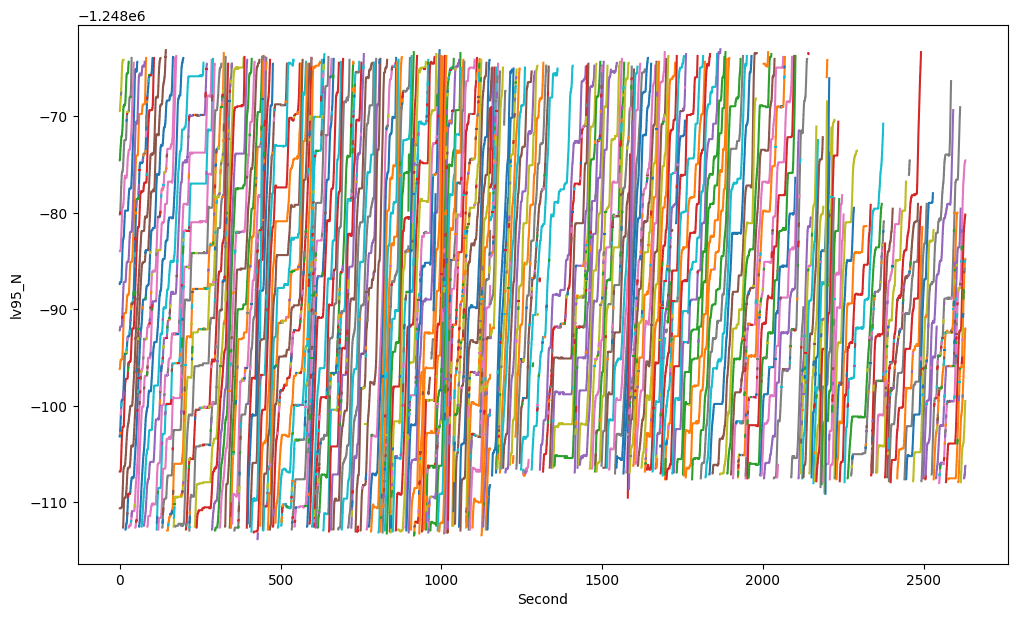

In [21]:
fig = plt.figure(figsize=(12, 7))
for tracker_id, group in df_track.groupby('tracker_id'):
    plt.plot(group['second'], -group['lv95_N'], label=f'Track {tracker_id}')
plt.xlabel('Second')
plt.ylabel('lv95_N')
plt.show()